# End-to-End ML Project

This is the data from the placement dataset from CampusX
Steps-
1. Preprocessing + EDA + Feature Selection
2. Extract Input and Output columns
3. Scale the values
4. Train-Test-Split
5. Train the Model
6. Evaluate the Model/ Model Selection
7. Deploy the model

In [15]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv('placement.csv')
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [17]:
# Pre Processing
# removing the unnecessary column
df = df.iloc[:, 1:]
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


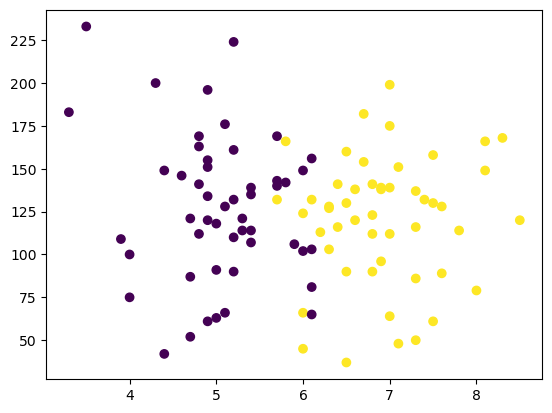

In [18]:
# EDA
plt.scatter(df['cgpa'], df['iq'], c=df['placement'])
# check out Logistic Regression

In [19]:
# Features are already selected since it has only three columns
# separate inputs and outputs
x = df.iloc[:, 0:2] # select CGPA and IQ
y = df.iloc[:, -1]  # select placement

In [25]:
# Train-Test-Split
# import sklearn
from sklearn.model_selection import train_test_split

# this essentially splits the documents into parts for testing and training. Random samples are taken
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1)
# test data is 10% of training data

In [26]:
x_train

,cgpa,iq
5,7.1,48.0
66,6.9,96.0
41,5.4,114.0
3,7.4,132.0
95,4.3,200.0
...,...,...
4,5.8,142.0
82,6.5,37.0
68,4.0,75.0
98,6.3,103.0


In [27]:
x_test

,cgpa,iq
59,4.8,112.0
42,7.6,89.0
25,5.0,91.0
46,5.3,114.0
28,5.2,90.0
63,6.3,128.0
93,6.8,112.0
15,5.1,176.0
44,7.5,61.0
14,6.1,103.0


In [28]:
y_train

5     1
66    1
41    0
3     1
95    0
     ..
4     0
82    1
68    0
98    1
50    0
Name: placement, Length: 90, dtype: int64

In [30]:
y_test

59    0
42    1
25    0
46    0
28    0
63    1
93    1
15    0
44    1
14    0
Name: placement, dtype: int64

In [33]:
# Scaling the values - works better with the model
# import Standard Scaler from Sklearn
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [36]:
x_train = scaler.fit_transform(x_train)
# scales the number range to -1 to +1
x_test = scaler.fit_transform(x_test)

In [60]:
# We have concluded from the Preprocessing that we are using the Logistic Regression
# import Logistic Regression from the sklearn library
from sklearn.linear_model import LogisticRegression
# create an Object to acces the Logistic Regression Class
clf = LogisticRegression()


In [61]:
# model training
clf.fit(x_train, y_train)
# since the data is small

LogisticRegression()

In [62]:
# Evaluate the Model
# use the x_test from earlier
y_pred = clf.predict(x_test)

In [49]:
y_test

59    0
42    1
25    0
46    0
28    0
63    1
93    1
15    0
44    1
14    0
Name: placement, dtype: int64

In [63]:
# now we compare the y_pred and y_test for accuracy
# import accuracy_score from sklearn.metrics
from sklearn.metrics import accuracy_score

In [64]:
accuracy_score(y_test, y_pred)
# We are getting a accuracy of 90%

0.9

In [65]:
# Plotting the Decision Boundary
# Since we are beginners we are importing other libraries
from mlxtend.plotting import plot_decision_regions

<Axes: >

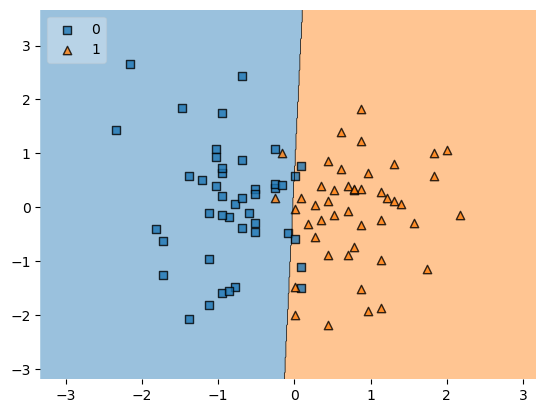

In [67]:
plot_decision_regions(x_train, y_train.values, clf=clf, legend=2)

In [70]:
# Now you will pick the trained the model and deploy it on the site
# we use the pickle library for picking the models
import pickle

In [72]:
pickle.dump(clf, open('model1.pkl', 'wb'))
# dump the created model in a file (model1.pkl)
# you can use this file(model1.pkl) for deploying this model anywhere